# **Experiencia en el Gimnasio**
---

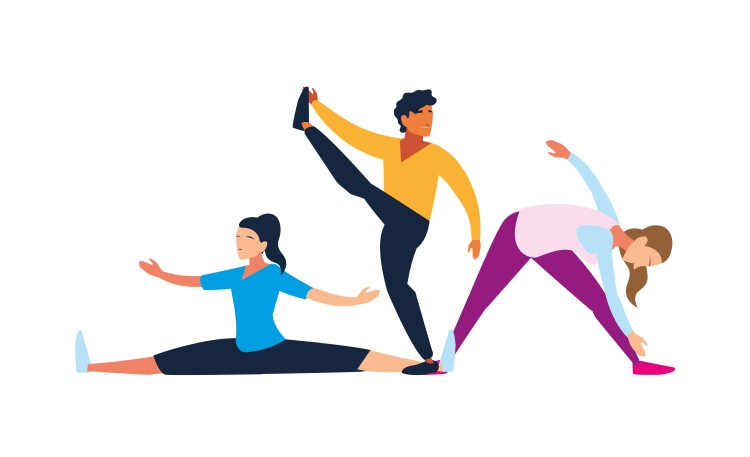

**Abstracto con Motivación y Audiencia**

El ejercicio físico es un componente esencial para mantener una vida saludable, impactando directamente en el bienestar físico y mental de las personas. Este conjunto de datos analiza diversas características de los miembros de un gimnasio, como edad, sexo, frecuencia cardíaca, hábitos de entrenamiento y composición corporal, con el objetivo de identificar patrones clave que optimicen los resultados del ejercicio

La motivación de este proyecto es identificar las características y comportamientos clave que impactan el rendimiento y los resultados al hacer ejercicio, para optimizar entrenamientos y promover hábitos saludables.

Este proyecto está dirigido a individuos y organizaciones interesados en profundizar su conocimiento sobre el ejercicio físico y sus beneficios. Incluye tanto a expertos en el ámbito del fitness y la salud, como a principiantes que desean aprender más sobre cómo optimizar sus entrenamientos y mejorar su salud.

**Contexto Comercial y Analítico:**

Cada vez más personas están interesadas en llevar una vida saludable, y uno de los factores clave para lograrlo es el ejercicio. Por ello, los expertos en el ámbito del fitness y la salud buscan información que permita personalizar las rutinas de entrenamiento y optimizar los resultados de sus clientes. Este análisis busca responder preguntas clave, como cuáles son los factores más importantes para maximizar el rendimiento y mejorar la composición corporal.

El conjunto de datos incluye 15 características relacionadas con las personas que asisten al gimnasio, abarcando datos demográficos, fisiológicos y de comportamiento, como edad, sexo, frecuencia cardíaca, duración de las sesiones, calorías quemadas y nivel de experiencia. A través de un análisis exploratorio de datos (EDA), se pretende identificar patrones y tendencias que puedan ser utilizados para diseñar estrategias de entrenamiento más efectivas y adaptadas a diferentes niveles de experiencia y objetivos personales. Este enfoque también puede ayudar a gimnasios y empresas del sector a ofrecer servicios más personalizados, mejorando la satisfacción y los resultados de los usuarios.

**Fuente**

https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

**Hipótesis**

Un mayor nivel de experiencia está asociado con sesiones más largas, menor porcentaje de grasa corporal y mejor control de la frecuencia cardíaca durante el ejercicio.

**Objetivo**

El objetivo principal de este proyecto es analizar las características que determinan el nivel de experiencia de una persona al ejercitarse y desarrollar un modelo de machine learning que permita predecir dicho nivel basado en sus atributos y comportamientos, como la frecuencia de entrenamiento, duración de las sesiones, frecuencia cardíaca y composición corporal.

# **Lectura de datos**

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Lectura del dataset**

In [388]:
df = pd.read_csv(r'C:\Users\juanc\Documents\Data Science\EDA - ExpGymMembers\data-gym_members_exercise.csv')

**Análisis inicial del dataset**

In [389]:
df.shape

(973, 15)

**Traducción de variables**

In [390]:
# Diccionario para renombrar las columnas
columnas_renombradas = {
    'Age': 'Edad',
    'Gender': 'Sexo',
    'Weight (kg)': 'Peso (kg)',
    'Height (m)': 'Altura (m)',
    'Max_BPM': 'FreqCardoaca_Max',
    'Avg_BPM': 'FreqCardiaca_Prom',
    'Resting_BPM': 'FreqCardiaca_Reposo',
    'Session_Duration (hours)': 'Duración_Sesion (hs)',
    'Calories_Burned': 'Calorias_Quemadas',
    'Workout_Type': 'Tipo_Entrenamiento',
    'Fat_Percentage': 'Porcentaje_Grasa',
    'Water_Intake (liters)': 'Ingesta_Agua',
    'Workout_Frequency (days/week)': 'Freq_Entrenamiento (días/semana)',
    'Experience_Level': 'Nivel_Experiencia',
    'BMI': 'IMC'
}

# Renombrar las columnas del DataFrame
df.rename(columns=columnas_renombradas, inplace=True)

df.head()

,Edad,Sexo,Peso (kg),Altura (m),FreqCardoaca_Max,FreqCardiaca_Prom,FreqCardiaca_Reposo,Duración_Sesion (hs),Calorias_Quemadas,Tipo_Entrenamiento,Porcentaje_Grasa,Ingesta_Agua,Freq_Entrenamiento (días/semana),Nivel_Experiencia,IMC
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Edad                              973 non-null    int64  
 1   Sexo                              973 non-null    object 
 2   Peso (kg)                         973 non-null    float64
 3   Altura (m)                        973 non-null    float64
 4   FreqCardoaca_Max                  973 non-null    int64  
 5   FreqCardiaca_Prom                 973 non-null    int64  
 6   FreqCardiaca_Reposo               973 non-null    int64  
 7   Duración_Sesion (hs)              973 non-null    float64
 8   Calorias_Quemadas                 973 non-null    float64
 9   Tipo_Entrenamiento                973 non-null    object 
 10  Porcentaje_Grasa                  973 non-null    float64
 11  Ingesta_Agua                      973 non-null    float64
 12  Freq_Ent

In [392]:
df.dtypes

Edad                                  int64
Sexo                                 object
Peso (kg)                           float64
Altura (m)                          float64
FreqCardoaca_Max                      int64
FreqCardiaca_Prom                     int64
FreqCardiaca_Reposo                   int64
Duración_Sesion (hs)                float64
Calorias_Quemadas                   float64
Tipo_Entrenamiento                   object
Porcentaje_Grasa                    float64
Ingesta_Agua                        float64
Freq_Entrenamiento (días/semana)      int64
Nivel_Experiencia                     int64
IMC                                 float64
dtype: object

**Descripción de variables**

<u>Edad</u>: Edad del miembro del gimnasio.

<u>Sexo</u>: Sexo del miembro del gimnasio (Masculino o Femenino).

<u>Peso</u> (kg): Peso del miembro en kilogramos.

<u>Altura</u> (m): Altura del miembro en metros.

<u>FreqCardoaca_Max</u>: Frecuencia cardíaca máxima (latidos por minuto) durante las sesiones de entrenamiento.

<u>FreqCardiaca_Prom</u>: Frecuencia cardíaca promedio durante las sesiones de entrenamiento.

<u>FreqCardiaca_Reposo</u>: Frecuencia cardíaca en reposo antes del entrenamiento.

<u>Duración_Sesion</u> (horas): Duración de cada sesión de entrenamiento en horas.

<u>Calorías_Quemadas</u>: Calorías totales quemadas durante cada sesión.

<u>Tipo_Entrenamiento</u>: Tipo de entrenamiento realizado (Cardio, Fuerza, Yoga, HIIT).

<u>Porcentaje_Grasa</u>: Porcentaje de grasa corporal del miembro.

<u>Ingesta_Agua</u> (litros): Ingesta diaria de agua durante los entrenamientos.

<u>Frecuencia_Entrenamiento</u> (días/semana): Número de sesiones de entrenamiento por semana.

<u>Nivel_Experiencia</u>: Nivel de experiencia, desde principiante (1) hasta experto (3).

<u>IMC</u>: Índice de masa corporal, calculado a partir de la altura y el peso.



In [393]:
df.dtypes.value_counts()

float64    7
int64      6
object     2
Name: count, dtype: int64

In [394]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Peso (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Altura (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
FreqCardoaca_Max,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
FreqCardiaca_Prom,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
FreqCardiaca_Reposo,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Duración_Sesion (hs),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calorias_Quemadas,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Porcentaje_Grasa,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Ingesta_Agua,973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


# **Limpieza y transformación de datos**

**Valores duplicados**

In [395]:
df.duplicated().sum()

0

**Valores nulos**

In [396]:
df.isnull().sum()

Edad                                0
Sexo                                0
Peso (kg)                           0
Altura (m)                          0
FreqCardoaca_Max                    0
FreqCardiaca_Prom                   0
FreqCardiaca_Reposo                 0
Duración_Sesion (hs)                0
Calorias_Quemadas                   0
Tipo_Entrenamiento                  0
Porcentaje_Grasa                    0
Ingesta_Agua                        0
Freq_Entrenamiento (días/semana)    0
Nivel_Experiencia                   0
IMC                                 0
dtype: int64

**Valores outliers**

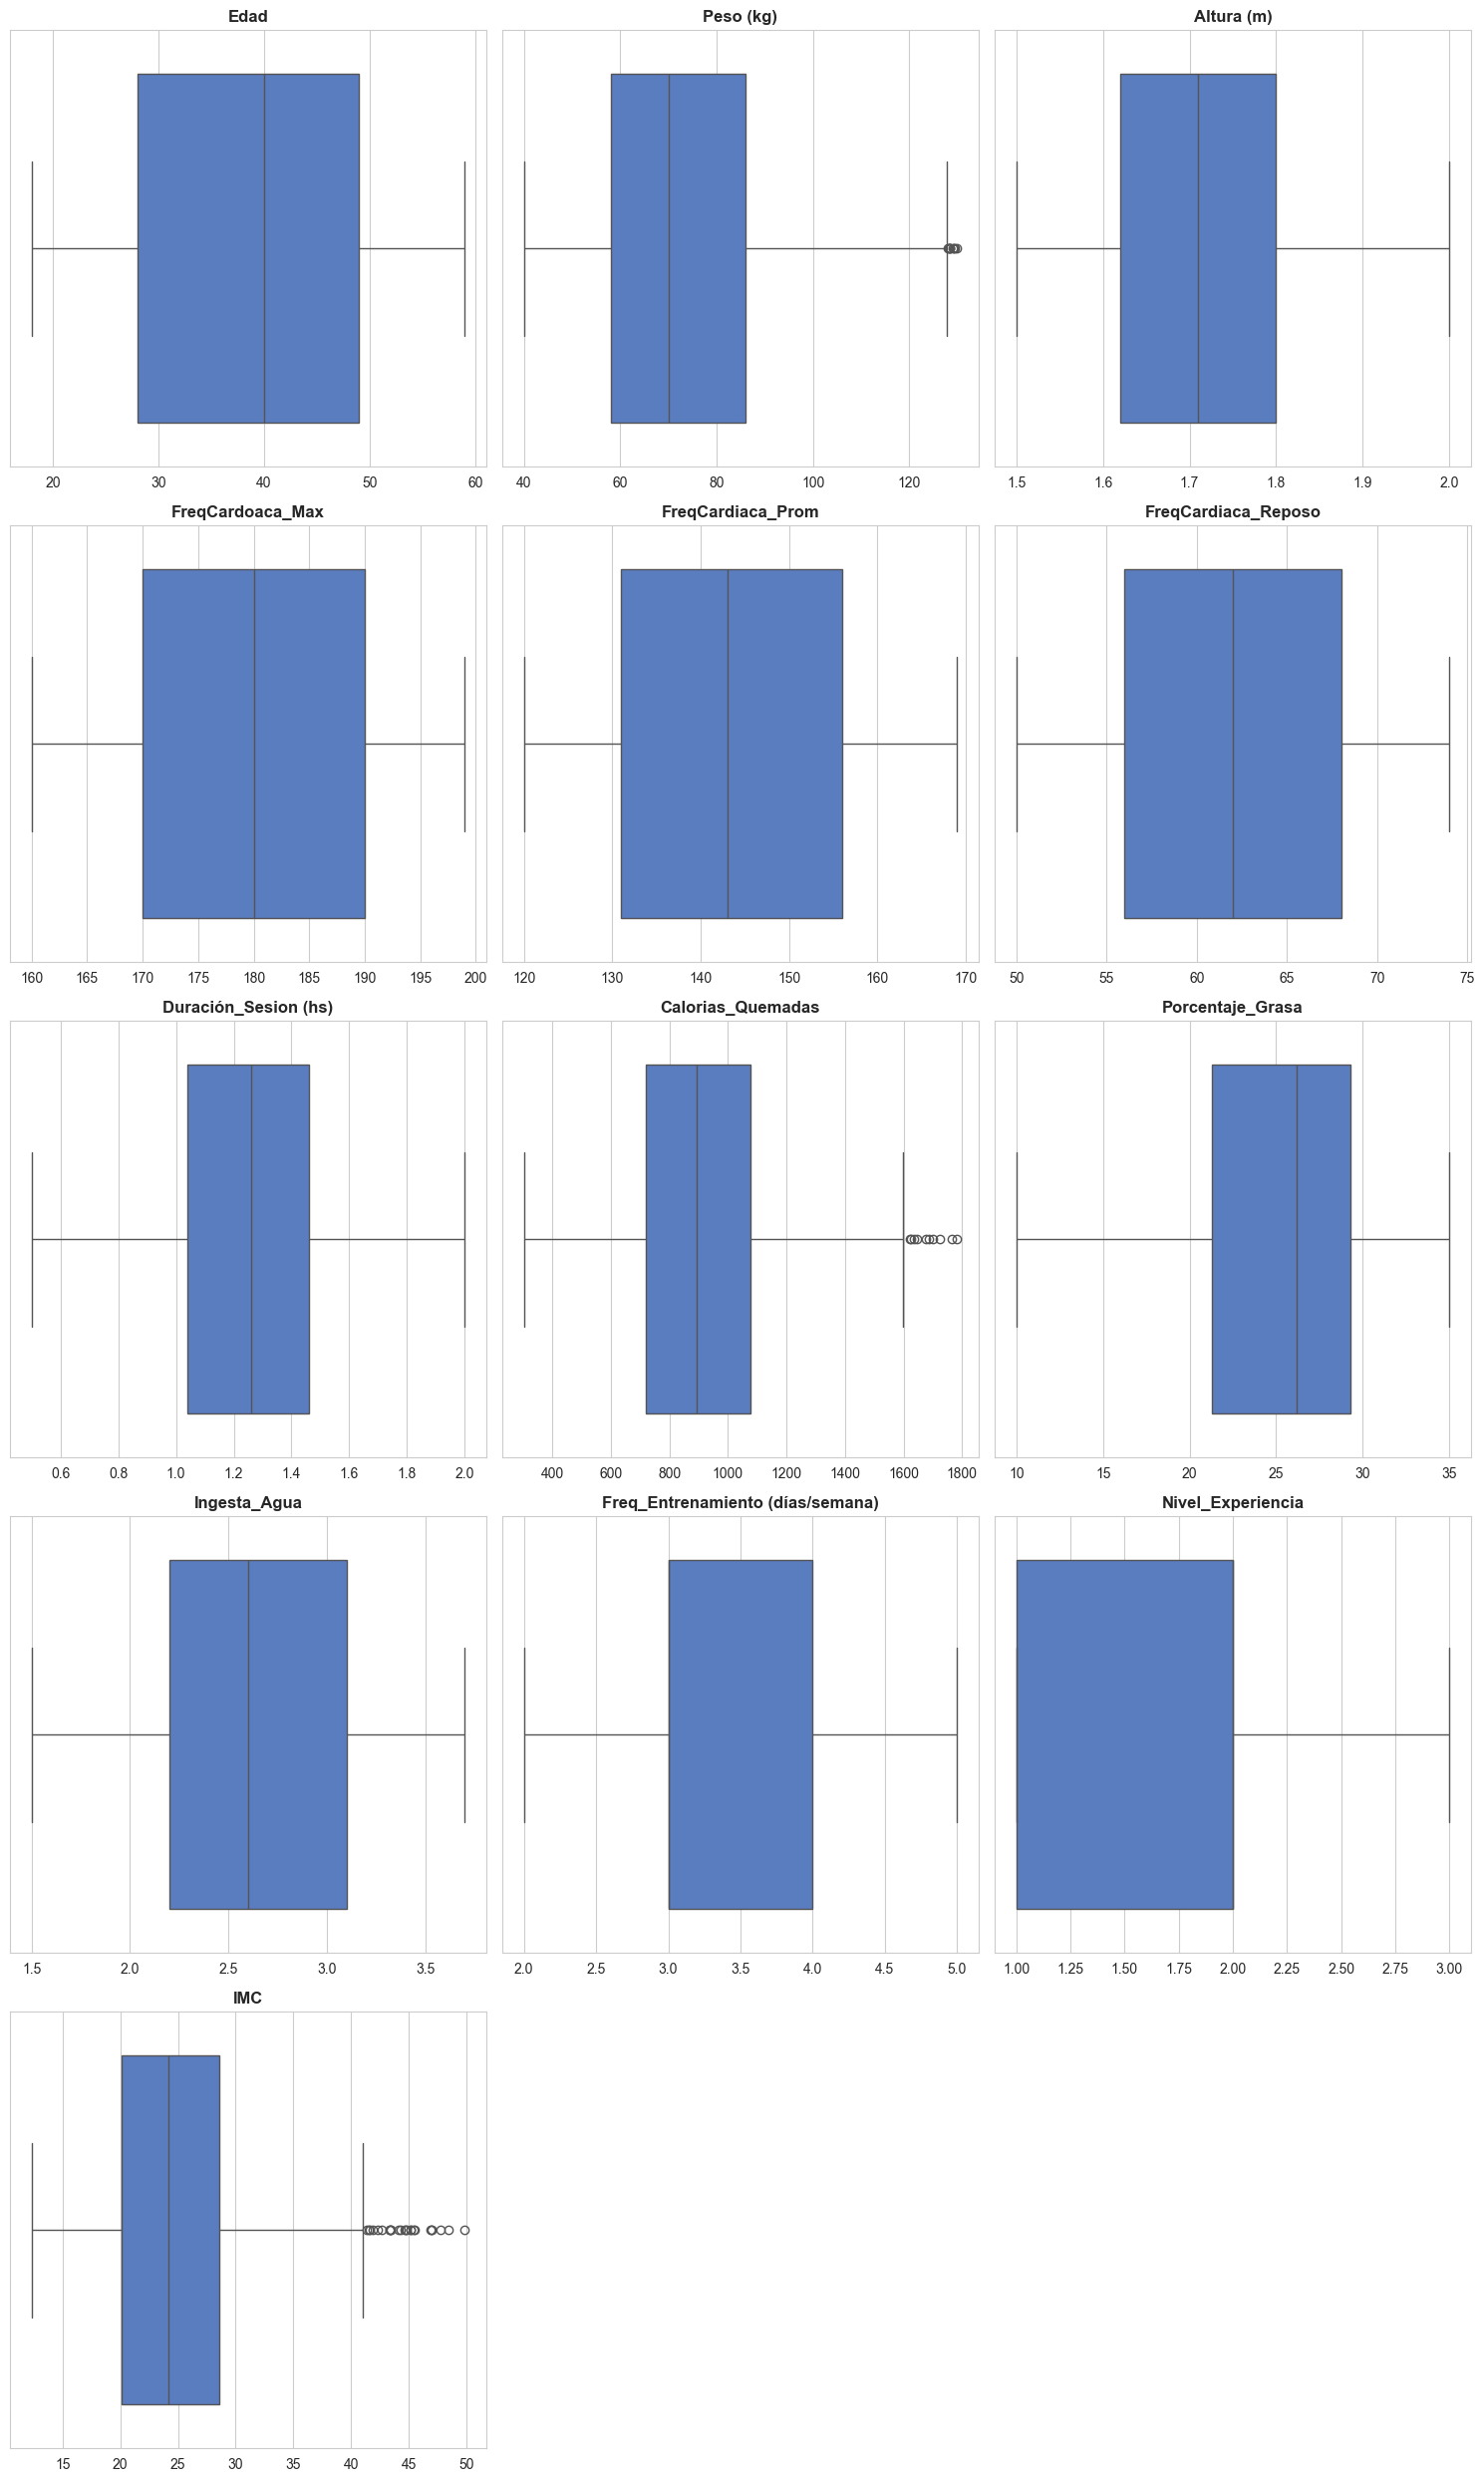

In [ ]:
# Configuración el estilo de los graficos
sns.set_style("whitegrid")  # Fondo limpio con rejilla ligera
sns.set_palette("muted")    # Colores suaves y atractivos

numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

plt.figure(figsize=(15, 5*num_rows))

for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"{col}", fontsize=12, weight='bold')  
    plt.xlabel('')
    plt.tight_layout()  
    
plt.show()


In [398]:
df.head()

,Edad,Sexo,Peso (kg),Altura (m),FreqCardoaca_Max,FreqCardiaca_Prom,FreqCardiaca_Reposo,Duración_Sesion (hs),Calorias_Quemadas,Tipo_Entrenamiento,Porcentaje_Grasa,Ingesta_Agua,Freq_Entrenamiento (días/semana),Nivel_Experiencia,IMC
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [399]:
# Traducir datos en 'Sexo' y 'Tipo_Entrenamiento'
df['Sexo'].replace({'Female': 'Femenino', 'Male': 'Masculino'}, inplace=True)
df['Tipo_Entrenamiento'].replace('Strength','Fuerza', inplace=True)

# **Análisis Exploratorio de datos (EDA)***

**Distribución de genero**

Sexo
Masculino    511
Femenino     462
Name: count, dtype: int64


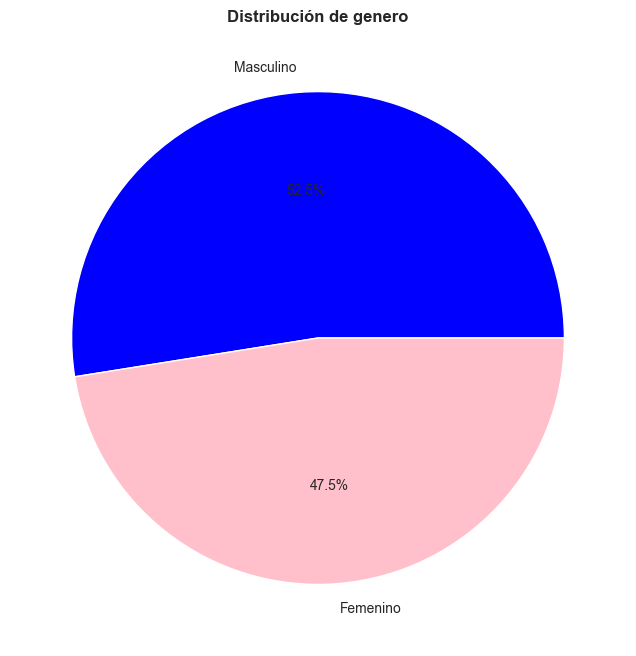

In [400]:
gender_counts = df['Sexo'].value_counts()
print(gender_counts)

plt.figure(figsize=(8,8))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',colors=['b','pink'])
plt.title("Distribución de genero", fontsize=12, weight='bold')  # Título en la parte superior

plt.show()

**Distribución del tipo de ejercicio**

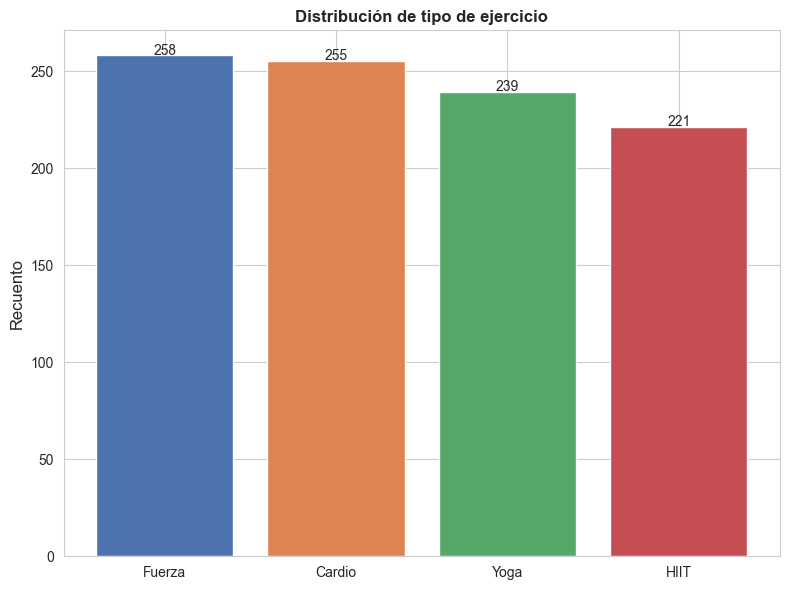

In [401]:
fig, ax = plt.subplots(figsize=(8, 6))

value_counts = df['Tipo_Entrenamiento'].value_counts()
colors = sns.color_palette("deep", len(value_counts))  # Paleta con 10 colores distintos


ax.bar(value_counts.index, value_counts.values, color= colors)
ax.set_title("Distribución de tipo de ejercicio", fontsize=12, weight='bold')
ax.set_ylabel("Recuento", fontsize=12)

# Mostrar valores sobre las barras
for i, count in enumerate(value_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


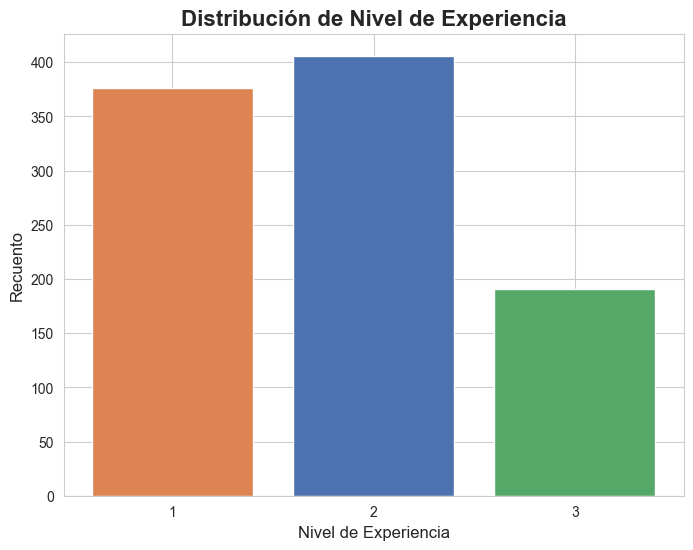

In [402]:
nivel_experiencia_counts = df['Nivel_Experiencia'].value_counts()

plt.figure(figsize=(8, 6))

bars = plt.bar(nivel_experiencia_counts.index, nivel_experiencia_counts.values, color=colors)

plt.title('Distribución de Nivel de Experiencia', fontsize=16, weight='bold')
plt.xlabel('Nivel de Experiencia', fontsize=12)
plt.ylabel('Recuento', fontsize=12)
plt.xticks([1, 2, 3])

plt.show()

**Frecuencia de entrenamiento (días/semana)**

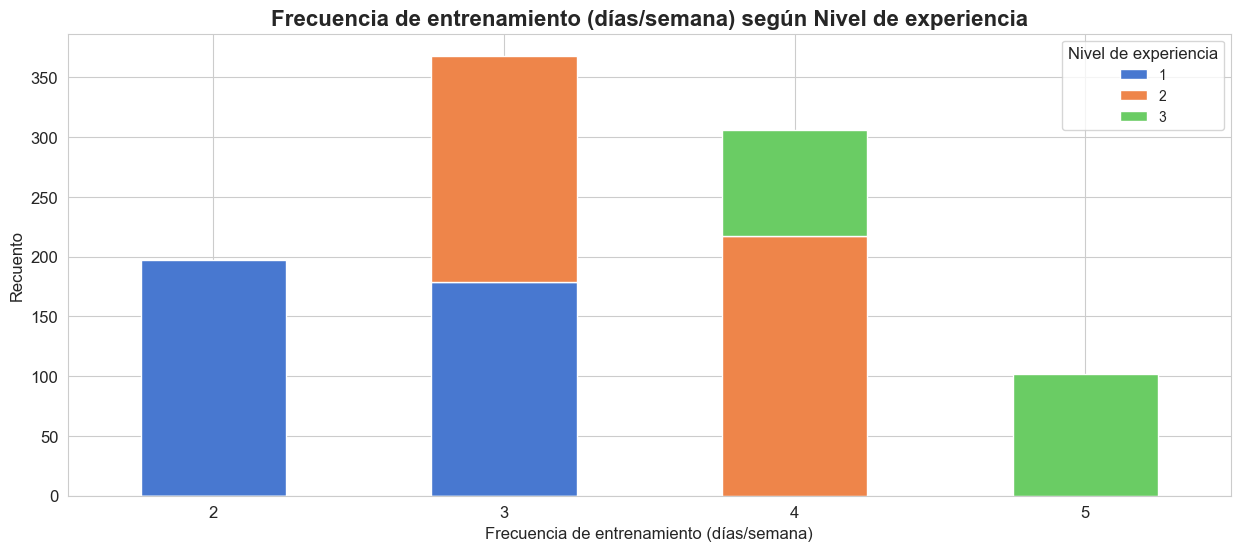

In [ ]:
# Contar la frecuencia de 'Workout_Frequency (days/week)' y 'Experience_Level'
stacked_data = df.groupby(['Freq_Entrenamiento (días/semana)', 'Nivel_Experiencia']).size().unstack(fill_value=0)

stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 6)
)

plt.title('Frecuencia de entrenamiento (días/semana) según Nivel de experiencia', fontsize=16, weight='bold')
plt.xlabel('Frecuencia de entrenamiento (días/semana)', fontsize=12)
plt.ylabel('Recuento', fontsize=12)
plt.legend(title='Nivel de experiencia', fontsize=10, title_fontsize=12)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**Pair plot**

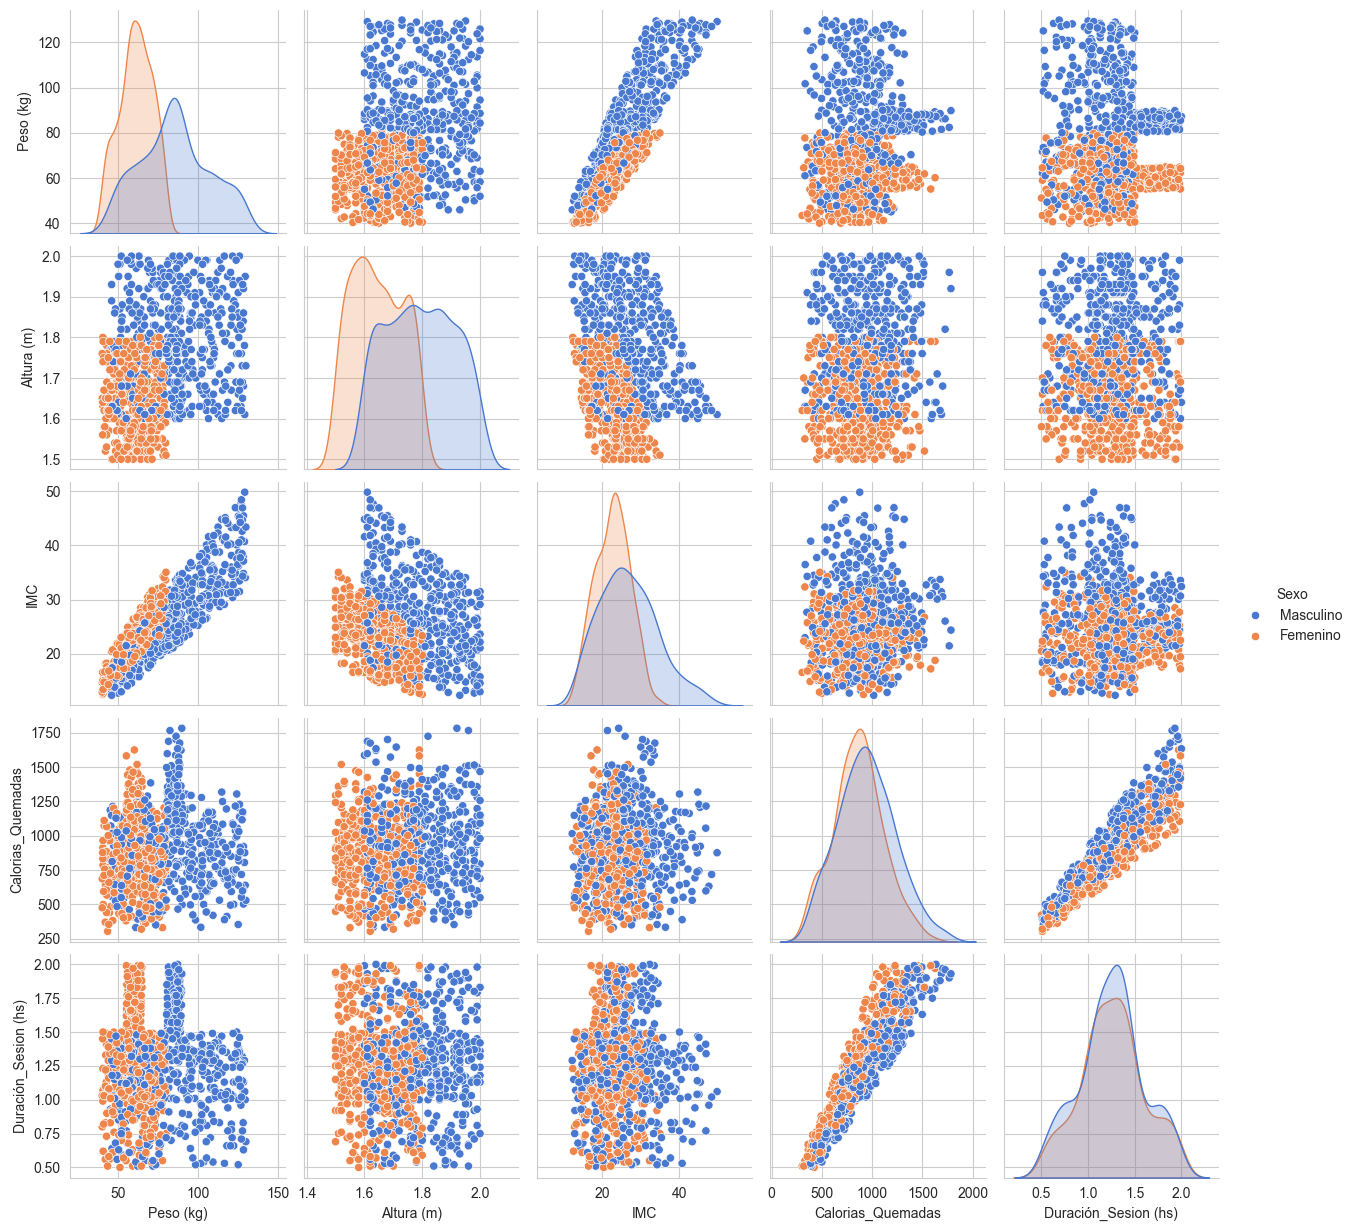

In [404]:
sns.pairplot(df[['Peso (kg)', 'Altura (m)', 'IMC', 'Calorias_Quemadas', 'Duración_Sesion (hs)', 'Sexo']], hue='Sexo')
plt.show()

**Ingesta de agua por Nivel de Experiencia**

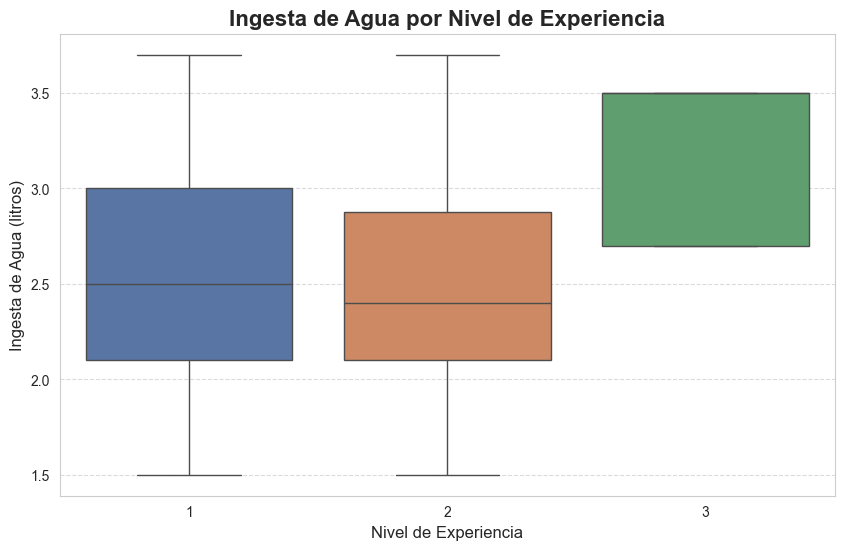

In [405]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df, 
    x="Nivel_Experiencia", 
    y="Ingesta_Agua", 
    palette="deep"
)

plt.title("Ingesta de Agua por Nivel de Experiencia", fontsize=16, weight='bold')
plt.xlabel("Nivel de Experiencia", fontsize=12)
plt.ylabel("Ingesta de Agua (litros)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Distribución del Porcentaje de Grasa por Nivel de Experiencia**

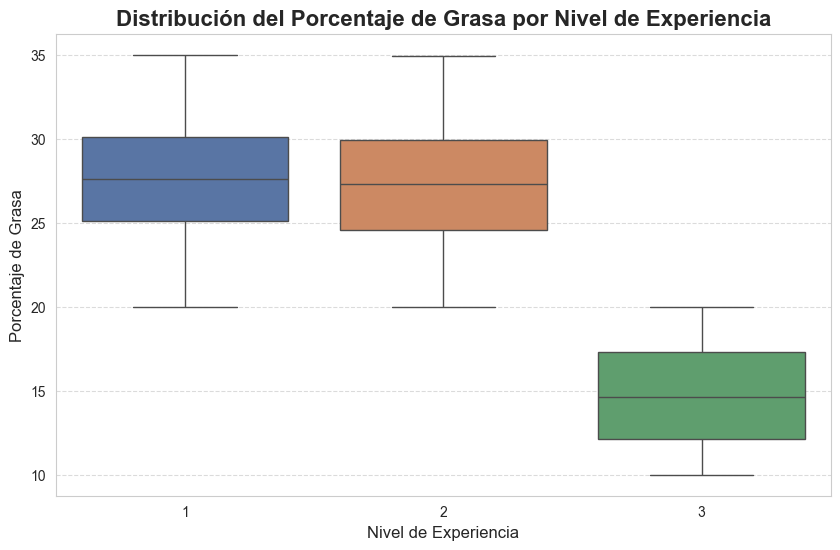

In [406]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df, 
    x="Nivel_Experiencia", 
    y="Porcentaje_Grasa", 
    palette="deep"
)

plt.title("Distribución del Porcentaje de Grasa por Nivel de Experiencia", fontsize=16, weight='bold')
plt.xlabel("Nivel de Experiencia", fontsize=12)
plt.ylabel("Porcentaje de Grasa", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

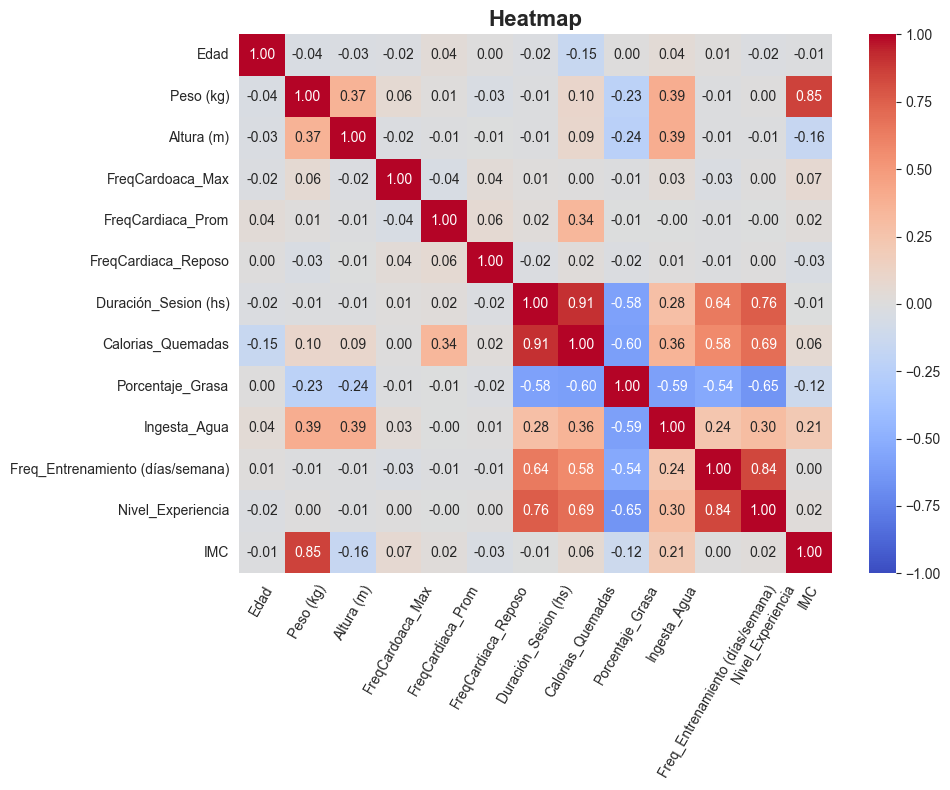

In [407]:
corr = numeric_columns.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    annot=True, # Mostrar los valores
    fmt='.2f', 
    cmap='coolwarm',
    vmin=-1, vmax=1, # Rango de correlación
)

plt.title("Heatmap", fontsize=16, weight='bold')
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.tight_layout() 

plt.show()

# **Modelos**

## **Regresion Logistica**

In [408]:
df_rl = df.copy()

In [409]:
# Identificar variables categóricas y numéricas
categorical_features = ['Sexo', 'Tipo_Entrenamiento']
numerical_features = [
    'Edad', 'Peso (kg)', 'Altura (m)', 'FreqCardoaca_Max',
    'FreqCardiaca_Prom', 'FreqCardiaca_Reposo', 'Duración_Sesion (hs)',
    'Calorias_Quemadas', 'Porcentaje_Grasa', 'Ingesta_Agua',
    'Freq_Entrenamiento (días/semana)', 'IMC'
]

# Separar las características (X) y la variable objetivo (y)
X = df_rl[categorical_features + numerical_features]
y = df_rl['Nivel_Experiencia']

**Preprocesamiento**

In [410]:
# One-hot encoding para variables categóricas y estandarización para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

**División de dataset**

In [411]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Entrenamiento del modelo**

In [412]:
# Crear un pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred, target_names=['Nivel 1', 'Nivel 2', 'Nivel 3'])
class_report_dict = classification_report(y_test, y_pred, target_names=['Nivel 1', 'Nivel 2', 'Nivel 3'], output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).transpose()


print(conf_matrix)
class_report_df.round(2)

[[ 98  19   0]
 [ 17 101   0]
 [  0   0  57]]


,precision,recall,f1-score,support
Nivel 1,0.85,0.84,0.84,117.00
Nivel 2,0.84,0.86,0.85,118.00
Nivel 3,1.00,1.00,1.00,57.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.90,0.90,0.90,292.00
weighted avg,0.88,0.88,0.88,292.00


La regresión logística para predecir el nivel de experiencia muestra un desempeño sólido con una precisión general del 88%. El modelo distingue claramente entre los niveles, especialmente para el "Nivel 3", que tiene una precisión perfecta. Sin embargo, hay ligeros errores al diferenciar entre "Nivel 1" y "Nivel 2", donde el modelo confunde algunas observaciones. En general, los resultados son buenos y el modelo puede ser útil para aplicaciones prácticas con ajustes menores para mejorar su precisión.

## **Arbol de Decisión**

**Cargar datos**

In [413]:
df_dtc = df.copy()

**Preprocesamiento de los datos**

In [414]:
# Codificar variables categóricas
df_dtc['Sexo'] = LabelEncoder().fit_transform(df_dtc['Sexo'])
df_dtc['Tipo_Entrenamiento'] = LabelEncoder().fit_transform(df_dtc['Tipo_Entrenamiento'])

**División del dataset**

In [415]:
X = df_dtc.drop(columns='Nivel_Experiencia')
y = df_dtc['Nivel_Experiencia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Entrenamiento**

In [416]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Evaluación del modelo**|

In [417]:
y_pred = clf.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print("Precisión del modelo:", accuracy)
print("\nInforme de clasificación:\n", report)
print("\nMatriz de confusión:\n", conf_matrix)

Precisión del modelo: 0.8666666666666667

Informe de clasificación:
               precision    recall  f1-score   support

           1       0.80      0.88      0.84        78
           2       0.87      0.77      0.82        75
           3       1.00      1.00      1.00        42

    accuracy                           0.87       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.87      0.87      0.87       195


Matriz de confusión:
 [[69  9  0]
 [17 58  0]
 [ 0  0 42]]


**Visualizar el árbol de decisión**

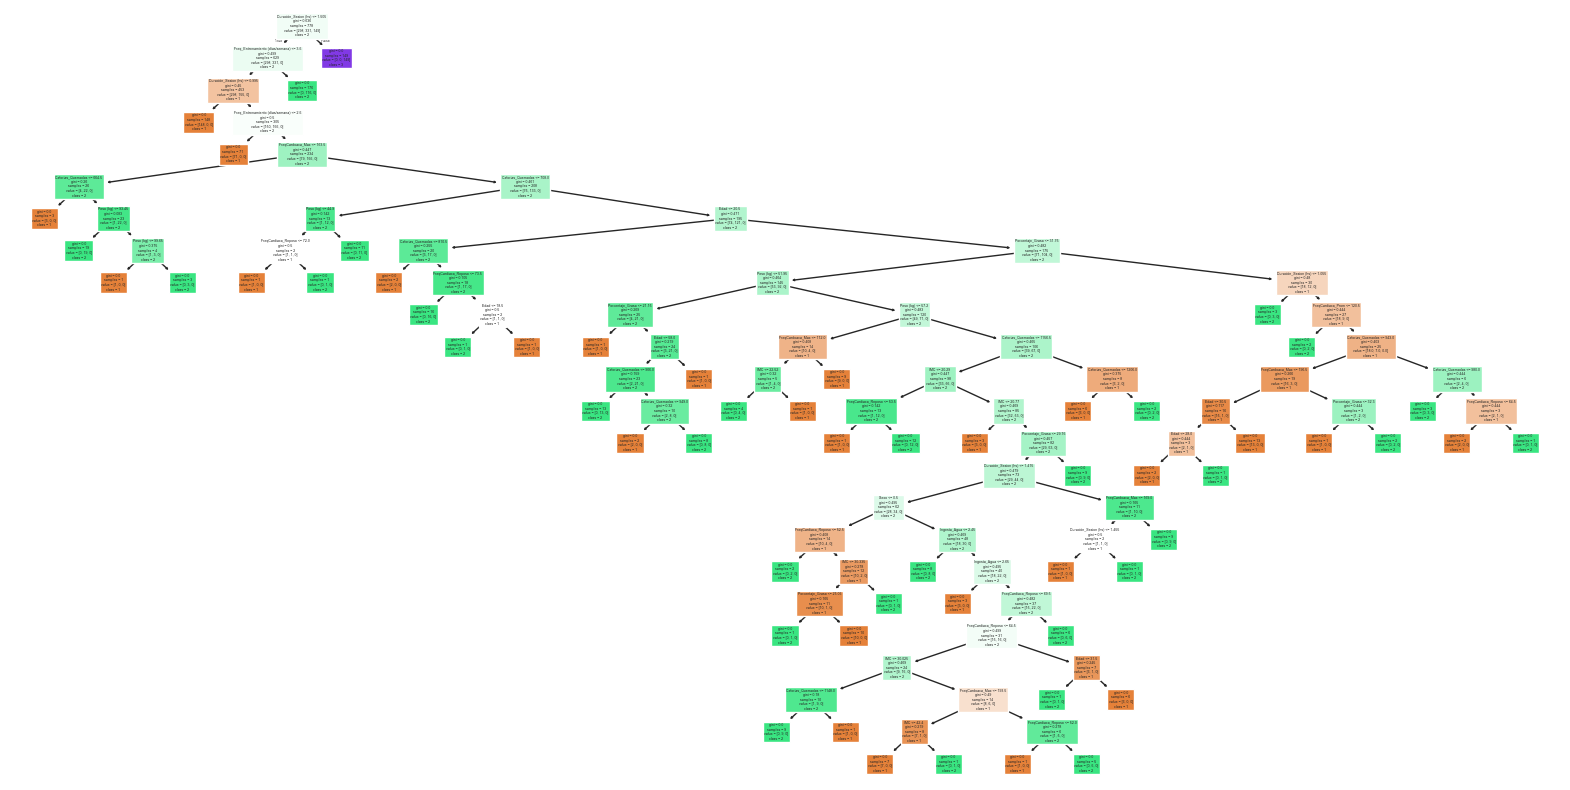

In [418]:
class_names = [str(cls) for cls in clf.classes_]
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()


El modelo de Árbol de Decisión alcanzó una precisión del 86.67%, clasificando correctamente la mayoría de los casos, especialmente para el nivel avanzado (Nivel_Experiencia = 3). Sin embargo, muestra cierta confusión entre niveles cercanos (1 y 2). Esto sugiere un buen desempeño inicial, pero con margen de mejora mediante optimización de parámetros como 'GridSearchCV' o métodos más avanzados como 'Random Forest', 'Gradient Boosting' o 'XGBoost'.